In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as sts
import math
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import rc,rcParams
from matplotlib.ticker import FormatStrFormatter
#rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
#rcParams['font.family'] = "sans-serif"

direc = 'C:/Users/Bas/Google Drive/Bas Games/'
fig_direc = 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/'

In [2]:
rcParams['figure.figsize'] = (8,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

#rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
#rcParams['pdf.fonttype'] = 42
#rcParams['text.usetex'] = True
#prop = font_manager.FontProperties(fname='C:/Windows/Fonts/HelveticaNeueLTCom-Roman.ttf')
#rcParams['text.latex.preamble']=r'\usepackage{amsmath}\n\usepackage{amsfonts}'

In [3]:
P = np.loadtxt(direc + 'Analysis/Generalization/prediction_2afc_final.txt')
accuracy_2afc_model = [100*np.mean(np.mean(P[P[:,0]==i,1:],axis=1)>0.5) for i in range(40)]
prediction_2afc_model = [np.mean(P[P[:,0]==i,1:],axis=1)>0.5 for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Generalization/prediction_eval_final.txt')
accuracy_eval_model = [np.corrcoef(np.mean(P[P[:,0]==i,2:],axis=1),P[P[:,0]==i,1])[0,1] \
                      for i in range(40)]
prediction_eval_model = [np.mean(P[P[:,0]==i,2:],axis=1) for i in range(40)]
eval_moves = [P[P[:,0]==i,1] for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Generalization/performance_gen_2afc.txt')
accuracy_2afc_oracle = [100*np.mean(P[P[:,0]==i,1]) for i in range(40)]
prediction_2afc_oracle = [P[P[:,0]==i,1] for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Generalization/performance_gen_eval.txt')
accuracy_eval_oracle = [np.corrcoef(P[P[:,0]==i,1],P[P[:,0]==i,2])[0,1] for i in range(40)]
prediction_eval_oracle = [P[P[:,0]==i,2] for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Generalization/mean_across_subjects_2afc.txt')
accuracy_2afc_map = [100*np.mean(P[P[:,0]==i,1]) for i in range(40)]
prediction_2afc_map = [P[P[:,0]==i,1] for i in range(40)]

P = np.round(np.loadtxt(direc + 'Analysis/Generalization/mean_across_subjects_eval.txt'))
accuracy_eval_map = [np.corrcoef(P[P[:,0]==i,1],P[P[:,0]==i,2])[0,1] for i in range(40)]
prediction_eval_map = [P[P[:,0]==i,2] for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Loglik/loglik_gen_final.txt')
loglik_games = -np.mean(np.reshape(np.mean(P,axis=1),[40,5]),axis=1)


OSError: C:/Users/Bas/Google Drive/Bas Games/Analysis/Generalization/prediction_2afc_final.txt not found.

In [4]:
def report_significance(p):
    if p>0.05:
        return "p=%(p).02f" % {'p':p}
    elif p>0.01:
        return "p<0.05"
    elif p>0.001:
        return "p<0.01"
    else:
        return "p<0.001"
    
def print_mean_and_sem(name,x,fmt):
    return "$" + name + ("=%(m)" + fmt + "\\pm %(sem)" + fmt + " ") % {'m': np.mean(x), 
                                                      'sem': np.std(x)/np.sqrt(len(x))} + "$"

def print_mean_and_sem_and_p(name,x,baseline,fmt):
    d = {'m': np.mean(x),'sem': np.std(x)/np.sqrt(len(x))}
    return "$" + name + ("=%(m)" + fmt + "\\pm %(sem)" + fmt + ", ") % d + \
    report_significance(sts.ttest_1samp(x,popmean=baseline).pvalue) + "$"

In [ ]:
import string
letters = list(string.ascii_uppercase)

models = ['Model','Oracle','Mean-across-participants']
data = ['2AFC','Evaluation']

for i,acc in enumerate([accuracy_2afc_model,accuracy_2afc_oracle,accuracy_2afc_map,
                        accuracy_eval_model,accuracy_eval_oracle,accuracy_eval_map]):
    fig,ax=plt.subplots()
    ax.set_title(data[i//3] + ': ' + models[i%3])
    ax.set_ylabel('Frequency')
    ax.set_yticks([])
    if(i<3):
        ax.axvline(x=50,linestyle='dashed',color='black')
        ax.set_xlabel('Percent correctly predicted')
    else:
        ax.axvline(x=0,linestyle='dashed',color='black')
        ax.set_xlabel('Correlation predicted/observed evaluations')
    ax.hist(acc,24)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.02, 0.9, letters[i], horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)

    fig.tight_layout()
    fig.savefig(fig_direc + 'generalization1_' + letters[i] + '.pdf')
    print(print_mean_and_sem_and_p("\\rho",acc,0,".02f"),sts.ttest_1samp(acc,popmean=50))
    plt.show()

In [4]:
m,s =zip(*[(100*np.mean(p),100*np.std(p)/np.sqrt(len(p))) for p in accuracy_2afc_model])
fig,ax=plt.subplots()
ax.axhline(50,linestyle='dashed',color='black')
ax.errorbar(x=range(1,41),y=np.sort(m),yerr=np.array(s)[np.argsort(m)],marker='p')
ax.set_ylabel('Percent correctly\npredicted')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_xticks([1,40])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc+'2afc.pdf')
plt.show()

NameError: name 'accuracy_2afc_model' is not defined

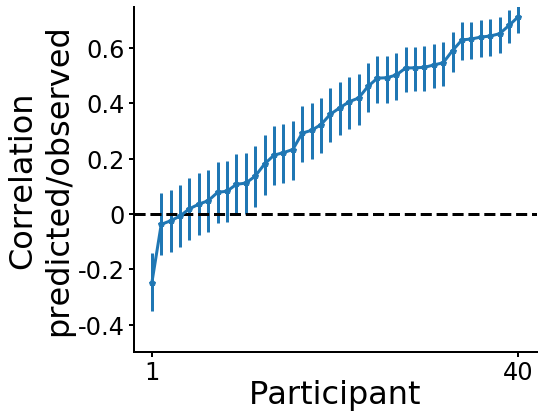

In [93]:
P = np.loadtxt(direc + 'Analysis/Generalization/performance_gen_eval.txt')
fig,ax=plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
m = np.array([sts.spearmanr(e1,e2).correlation for e1,e2 in zip(prediction_eval_model,eval_moves)])
lower = m-np.tanh(np.arctanh(m) - 1/np.sqrt(79))
upper = np.tanh(np.arctanh(m) + 1/np.sqrt(79))-m
ax.axhline(0,linestyle='dashed',color='black')
ax.errorbar(x=range(1,41),y=np.sort(m),yerr=[np.array(lower)[np.argsort(m)],np.array(upper)[np.argsort(m)]],marker='p')
ax.set_ylabel('Correlation\npredicted/observed')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_xticks([1,40])
ax.set_ylim([-0.5,0.75])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc+'eval.pdf')
plt.show()

In [76]:
upper

array([0.60468726, 0.62154038, 0.43023344, 0.30501776, 0.4054588 ,
       0.81946171, 0.4991353 , 0.49189054, 0.40922645, 0.69635738,
       0.28946066, 0.64676566, 0.63714806, 0.27743949, 0.55365277,
       0.38064947, 0.69749173, 0.72851299, 0.32861412, 0.72098992,
       0.78907374, 0.57692857, 0.80101744, 0.56151678, 0.06768654,
       0.79341529, 0.35458136, 0.79572206, 0.73359276, 0.72261094,
       0.76256153, 0.46641451, 0.34350467, 0.8389087 , 0.38434325,
       0.72164604, 0.78698091, 0.7040801 , 0.67600272, 0.50806453])

In [56]:
[sts.spearmanr(e1,e2).correlation for e1,e2 in zip(prediction_eval_model,eval_moves)]

0.33635877732512004

In [ ]:
plt.hist(accuracy_eval_map,10)
plt.show()
print("eval:",print_mean_and_sem_and_p("\\rho",accuracy_eval_map,0,".02f"))

plt.hist(accuracy_2afc_map,10)
plt.show()
print("2afc:",print_mean_and_sem_and_p("p_{\\text{correct}}",accuracy_2afc_map,0.5,".03f"))

In [ ]:
plt.hist(accuracy_eval_oracle,10)
plt.show()
print("eval:",print_mean_and_sem_and_p("\\rho",accuracy_eval_oracle,0,".02f"))

plt.hist(accuracy_2afc_oracle,10)
plt.show()
print("2afc:",print_mean_and_sem_and_p("p_{\\text{correct}}",accuracy_2afc_oracle,0.5,".03f"))

In [ ]:
fig,ax=plt.subplots()
ax.set_title('2AFC')
ax.set_xlabel('Percent correctly predicted: model')
ax.set_ylabel('Percent correctly predicted: baseline')
plt.plot(accuracy_2afc_model,accuracy_2afc_oracle,'o',label='Oracle')
plt.plot(accuracy_2afc_model,accuracy_2afc_map,'o',label = 'Mean-across-participants')
plt.legend(frameon=False)
plt.plot([40,85],[40,85],'-k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'A', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)

fig.tight_layout()
fig.savefig(fig_direc + 'generalization2_A.pdf')
plt.show()

print(sts.spearmanr(accuracy_2afc_model,accuracy_2afc_map))
print(sts.spearmanr(accuracy_2afc_model,accuracy_2afc_oracle))

In [ ]:
fig,ax=plt.subplots()
ax.set_title('Evaluation')
ax.set_xlabel('Correlation predicted/observed: model')
ax.set_ylabel('Correlation predicted/observed: baseline')
plt.plot(accuracy_eval_model,accuracy_eval_oracle,'o',label='Oracle')
plt.plot(accuracy_eval_model,accuracy_eval_map,'o',label = 'Mean-across-participants')
plt.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'B', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)

plt.plot([-0.2,1],[-0.2,1],'-k')
fig.tight_layout()
fig.savefig(fig_direc + 'generalization2_B.pdf')
plt.show()

print(sts.spearmanr(accuracy_eval_model,accuracy_eval_map))
print(sts.spearmanr(accuracy_eval_model,accuracy_eval_oracle))

In [ ]:
fig,ax=plt.subplots()
ax.set_xlabel('Log-likelihood for play-against-AI')
ax.set_ylabel('2AFC accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'A', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
plt.plot(loglik_games,accuracy_2afc_model,'ok')
fig.tight_layout()
fig.savefig(fig_direc + 'generalization3_A.pdf')
plt.show()
print("2afc-games:",sts.spearmanr(loglik_games,accuracy_2afc_model))

In [ ]:
fig,ax=plt.subplots()
ax.set_xlabel('Log-likelihood for play-against-AI')
ax.set_ylabel('Evaluation accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'B', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
plt.plot(loglik_games,accuracy_eval_model,'ok')
fig.tight_layout()
fig.savefig(fig_direc + 'generalization3_B.pdf')
plt.show()
print("2afc-games:",sts.spearmanr(loglik_games,accuracy_eval_model))

In [ ]:
fig,ax=plt.subplots()
ax.set_xlabel('Evaluation accuracy')
ax.set_ylabel('2AFC accuracy')
plt.plot(accuracy_eval_model,accuracy_2afc_model,'ok')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'C', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
fig.tight_layout()
fig.savefig(fig_direc + 'generalization3_C.pdf')
plt.show()
print("2afc-eval:",sts.spearmanr(accuracy_eval_model,accuracy_2afc_model))

In [ ]:
all_beta = [sm.ols(formula="y ~ x1 + x2 + x3", 
        data=pd.DataFrame({'y' : eval_moves[i],
                           'x1': prediction_eval_model[i], 
                           'x2' : prediction_eval_map[i], 
                           'x3' : prediction_eval_oracle[i]})
       ).fit().params for i in range(40)]

for x in ['x1','x2','x3']:
    beta = [b[x] for b in all_beta]
    print(print_mean_and_sem_and_p("\\beta",beta,0,".02f"))

In [ ]:
from scipy.optimize import minimize

def accuracy_2afc(X,beta):
    return np.mean(np.dot(np.vstack(X).T,np.array(beta)/np.sum(beta))>0.5)

def get_beta(i):
    f = lambda beta: 1-accuracy_2afc([prediction_2afc_map[i],
                                     prediction_2afc_model[i],
                                     prediction_2afc_map[i]],beta)
    return minimize(f,[1/3,1/3,1/3], method='COBYLA', options={'disp': False})


In [ ]:
f = lambda beta: 1-accuracy_2afc([prediction_2afc_map[0],
                                     prediction_2afc_model[0],
                                     prediction_2afc_map[0]],beta)
f([1,2,0])